In [27]:
# basics
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

# warnings and debugging
import importlib
import ipdb; #ipdb.set_trace()

import warnings
warnings.filterwarnings("once")  # Ensures warnings appear on every cell run
#warnings.simplefilter("once")
#warnings.simplefilter("error") #handle warnings as errors (used for DepreactionWarnings)
#warnings.simplefilter("default")

# modelbase
import modelbase
from modelbase.ode import Simulator
from scipy import integrate

print(importlib.metadata.version("modelbase"))

# working directory
script_dir = globals().get("script_dir", os.getcwd()) # if script_dir exists, use it, otherwise use cwd
#print(script_dir)
os.chdir(f"{script_dir}/..")
#print(os.getcwd())

from models import get_model

m = get_model()


1.30.0


# Model

In [28]:
#stoichio_subset = m.get_stoichiometric_df().loc[:,["v2_to_P700FA-", "v3_to_P700FA", "v4_to_P700+FA", "v5_to_P700FA"]]
#stoichio_subset.loc[(stoichio_subset != 0).any(axis=1)]


In [15]:
#m.get_algebraic_module("P700+FA_alm")
print(m.get_algebraic_module("P700+FA_alm"))
m.get_algebraic_module("P700+FA_alm")

moiety_3(P700FA-, P700FA, P700+FA-, PSItot) -> ['P700+FA']


{'name': 'P700+FA_alm', 'function': <function moiety_3 at 0x000001CF9B9E6280>, 'compounds': ['P700FA-', 'P700FA', 'P700+FA-'], 'derived_compounds': ['P700+FA'], 'modifiers': [], 'parameters': ['PSItot'], 'dynamic_variables': ['P700FA-', 'P700FA', 'P700+FA-'], 'args': ['P700FA-', 'P700FA', 'P700+FA-', 'PSItot']}

In [ ]:
#m.get_compound_stoichiometry("PC")
m.get_compound_stoichiometry("PC")

{'vB6f': -2, 'v2_to_P700FA-': 1, 'v5_to_P700FA': 1}

In [6]:
#m.get_parameter("k1")
m.get_parameter("k1")

5000000000.0

In [5]:
#m.get_rate_args("v2_to_P700FA-")
m.get_rate_args("v2_to_P700FA-")

['P700+FA-', 'PCred', 'PC', 'P700FA-', 'kPCox', 'Keq_PCP700']

In [4]:
#m.get_rate_function("v2_to_P700FA-")(1,2,3,4,5,6)
m.get_rate_function("v2_to_P700FA-")(1,2,3,4,5,6)

0.0

In [9]:
m.check_unused_compounds()

set()

In [10]:
m.check_missing_parameters()

set()

In [11]:
m.check_unused_parameters()

{'APX0',
 'ATPcyt',
 'CN',
 'Ca',
 'Ctot',
 'E0_cytf',
 'Keq_cyc',
 'Km161',
 'Km162',
 'Kmnadph',
 'NADPHcyt',
 'bH',
 'dT',
 'k1',
 'k1APX',
 'k1rev',
 'k2APX',
 'k3APX',
 'k4',
 'k4APX',
 'k5',
 'k5APX',
 'k6',
 'k7',
 'k8',
 'kATPcons',
 'kActATPase',
 'kDeactATPase',
 'kNADPHcons',
 'kNh',
 'kNr',
 'kProtonation',
 'kdeg',
 'krep',
 'nH',
 'pHmedium',
 'prob_attach'}

# Simulator

In [15]:
y0 = {
    "PQ": 11.027139850905353,"PC": 1.8895071932002812,"Fd": 3.8690237263896705,"ATP": 1.620195002854852,"NADPH": 0.4882103700673736,"H": 0.0022147075094596015,
    "LHC": 0.8023074419510501,"Psbs": 0.9607146039898598,"Vx": 0.950783616933656,"PGA": 0.9913970817549008,"BPGA": 0.0005355311557548053,"GAP": 0.0062630116252017295,
    "DHAP": 0.13778623933075737,"FBP": 0.006126990841013743,"F6P": 0.31166103888161867,"G6P": 0.7168203893211117,"G1P": 0.041575582577936025,"SBP": 0.01311315151803723,
    "S7P": 0.15782894767619207,"E4P": 0.00732079113061801,"X5P": 0.022396849486562384,"R5P": 0.03751472214765548,"RUBP": 0.13153657267999222,"RU5P": 0.015005888732707041,
    "MDA": 5.85270097771621e-06,"ASC": 9.999994138785292,"H2O2": 3.4273920330125316e-06,"DHA": 8.513863740903352e-09,"GSH": 9.999999991725186,"GSSG": 4.137406632226743e-09,
    "TR_ox": 0.9,"E_inactive": 4.7368421052631575,
    "P700FA": 1.4731,            #eq at pfd 800       #"PSItot": 2.5, (in parameter vector of Matuszynska)
    "P700+FA-": 0.0131,
    "P700FA-": 0.0177,
}

In [18]:
s = Simulator(m)
s.initialise(y0)
t_end = 200
steps_per_second = 1

steps = steps_per_second * t_end

pfd = 500
s.update_parameter("pfd", pfd)

_ = s.simulate(t_end = t_end, steps = steps)

(<Figure size 1000x700 with 1 Axes>,
 <Axes: xlabel='Remember to label your axes', ylabel='Remember to label your axes'>)

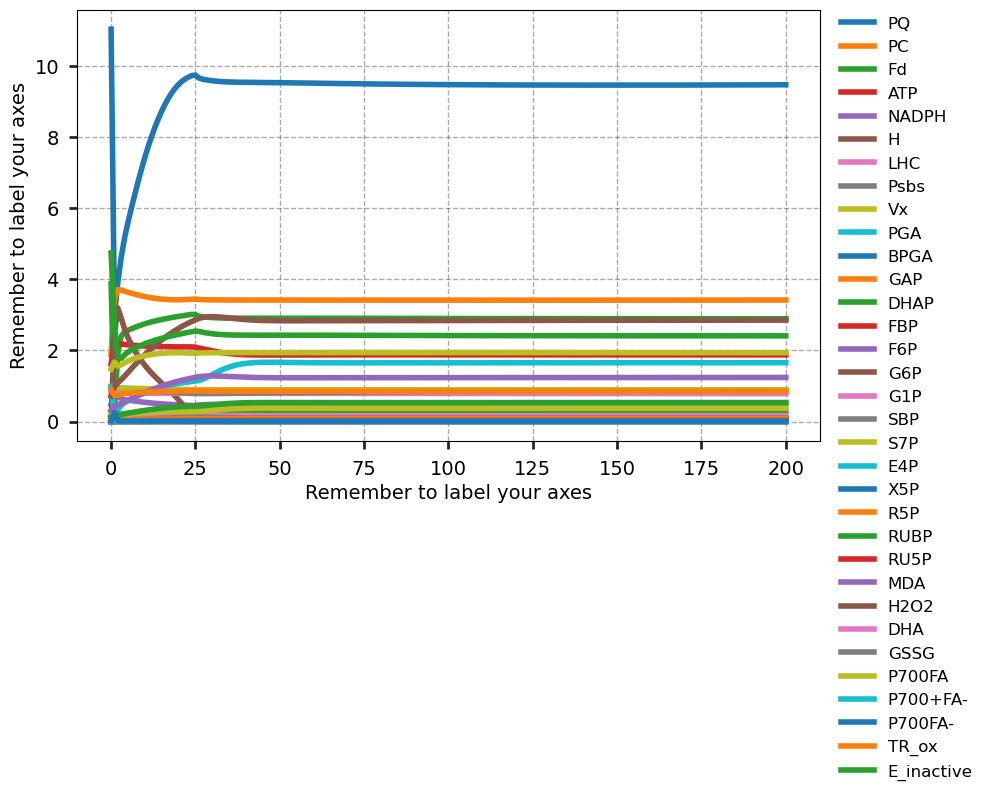

In [26]:
s.plot()

In [31]:
help(s.get_new_y0)

Help on method get_new_y0 in module modelbase.ode.simulators.abstract_simulator:

get_new_y0() -> 'dict[str, float] | None' method of modelbase.ode.simulators.simulator._Simulate instance

